In [1]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load dataset
dataset = load_dataset("kannanwisen/Indian-Traffic-Sign-Classification")

# The dataset has only 'train' split, so we split it ourselves
data = dataset["train"]

# Split indices for 80% train, 20% validation
train_indices, val_indices = train_test_split(range(len(data)), test_size=0.2, random_state=42)

train_data = data.select(train_indices)
val_data = data.select(val_indices)

# Define preprocessing function
def preprocess(example):
    image = example["image"]
    image = image.convert("RGB")  # Convert to RGB if not already
    image = tf.image.convert_image_dtype(tf.constant(np.array(image)), tf.float32)  # ensures float32
    image = tf.image.resize(image, (64, 64))  # resize all to 64x64
    label = example["label"]
    return {"image": image, "label": label}

# Apply preprocessing
train_data = train_data.map(preprocess)
val_data = val_data.map(preprocess)


# Convert to TensorFlow dataset
train_ds = train_data.to_tf_dataset(columns=["image"], label_cols=["label"], shuffle=True, batch_size=32)
val_ds = val_data.to_tf_dataset(columns=["image"], label_cols=["label"], shuffle=True, batch_size=32)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

Map:   0%|          | 0/1146 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [ ]:
num_classes = dataset["train"].features["label"].num_classes
print(num_classes)

85


In [5]:
traffic_sign_classes = num_classes

In [6]:
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(traffic_sign_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=10)
#model.save("indian_traffic_sign_cnn.h5")

Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.1314 - loss: 3.7446 - val_accuracy: 0.3935 - val_loss: 2.1681
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.4860 - loss: 1.7871 - val_accuracy: 0.6239 - val_loss: 1.2975
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.7106 - loss: 0.9980 - val_accuracy: 0.7531 - val_loss: 0.9180
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8261 - loss: 0.6055 - val_accuracy: 0.7784 - val_loss: 0.8532
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8748 - loss: 0.4160 - val_accuracy: 0.8063 - val_loss: 0.7634
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9359 - loss: 0.2153 - val_accuracy: 0.8412 - val_loss: 0.7760
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9593 - loss: 0.1404 - val_accuracy: 0.8473 - val_loss: 0.7391
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.9709 - loss: 0.1272 - val_accu

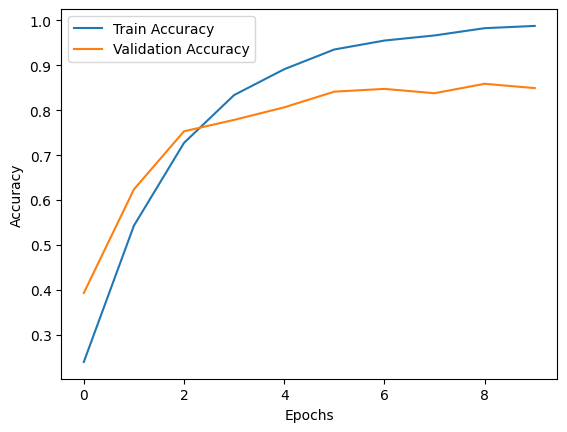

In [9]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

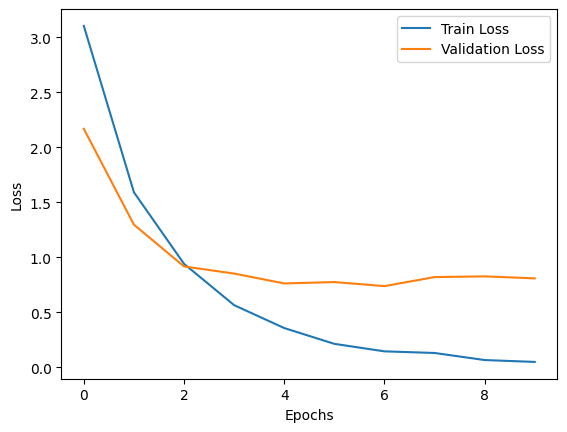

In [10]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model.save("indian_traffic_sign_cnn.h5")

In [12]:
from google.colab import files
files.download("indian_traffic_sign_cnn.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>